# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
df.nunique()

Unnamed: 0          114000
track_id             89741
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64

In [5]:
print("Explicit      : ", df.explicit.unique())
print("Mode          : ", df['mode'].unique())
print("Key           : ", df.key.unique())
print("Time Signature: ", df.time_signature.unique())

Explicit      :  [False  True]
Mode          :  [0 1]
Key           :  [ 1  0  2  6 11  8  4  7  3 10  5  9]
Time Signature:  [4 3 1 5 0]


In [6]:
df.shape

(114000, 21)

## Dealing with duplicate values

In [7]:
df.duplicated().sum()

0

## Dealing With missing values

In [8]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
df.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'],axis=1, inplace=True)
df.isnull().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [10]:
df.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

# EDA Analysis

In [11]:
obj = df.select_dtypes(include=['bool','object']).columns

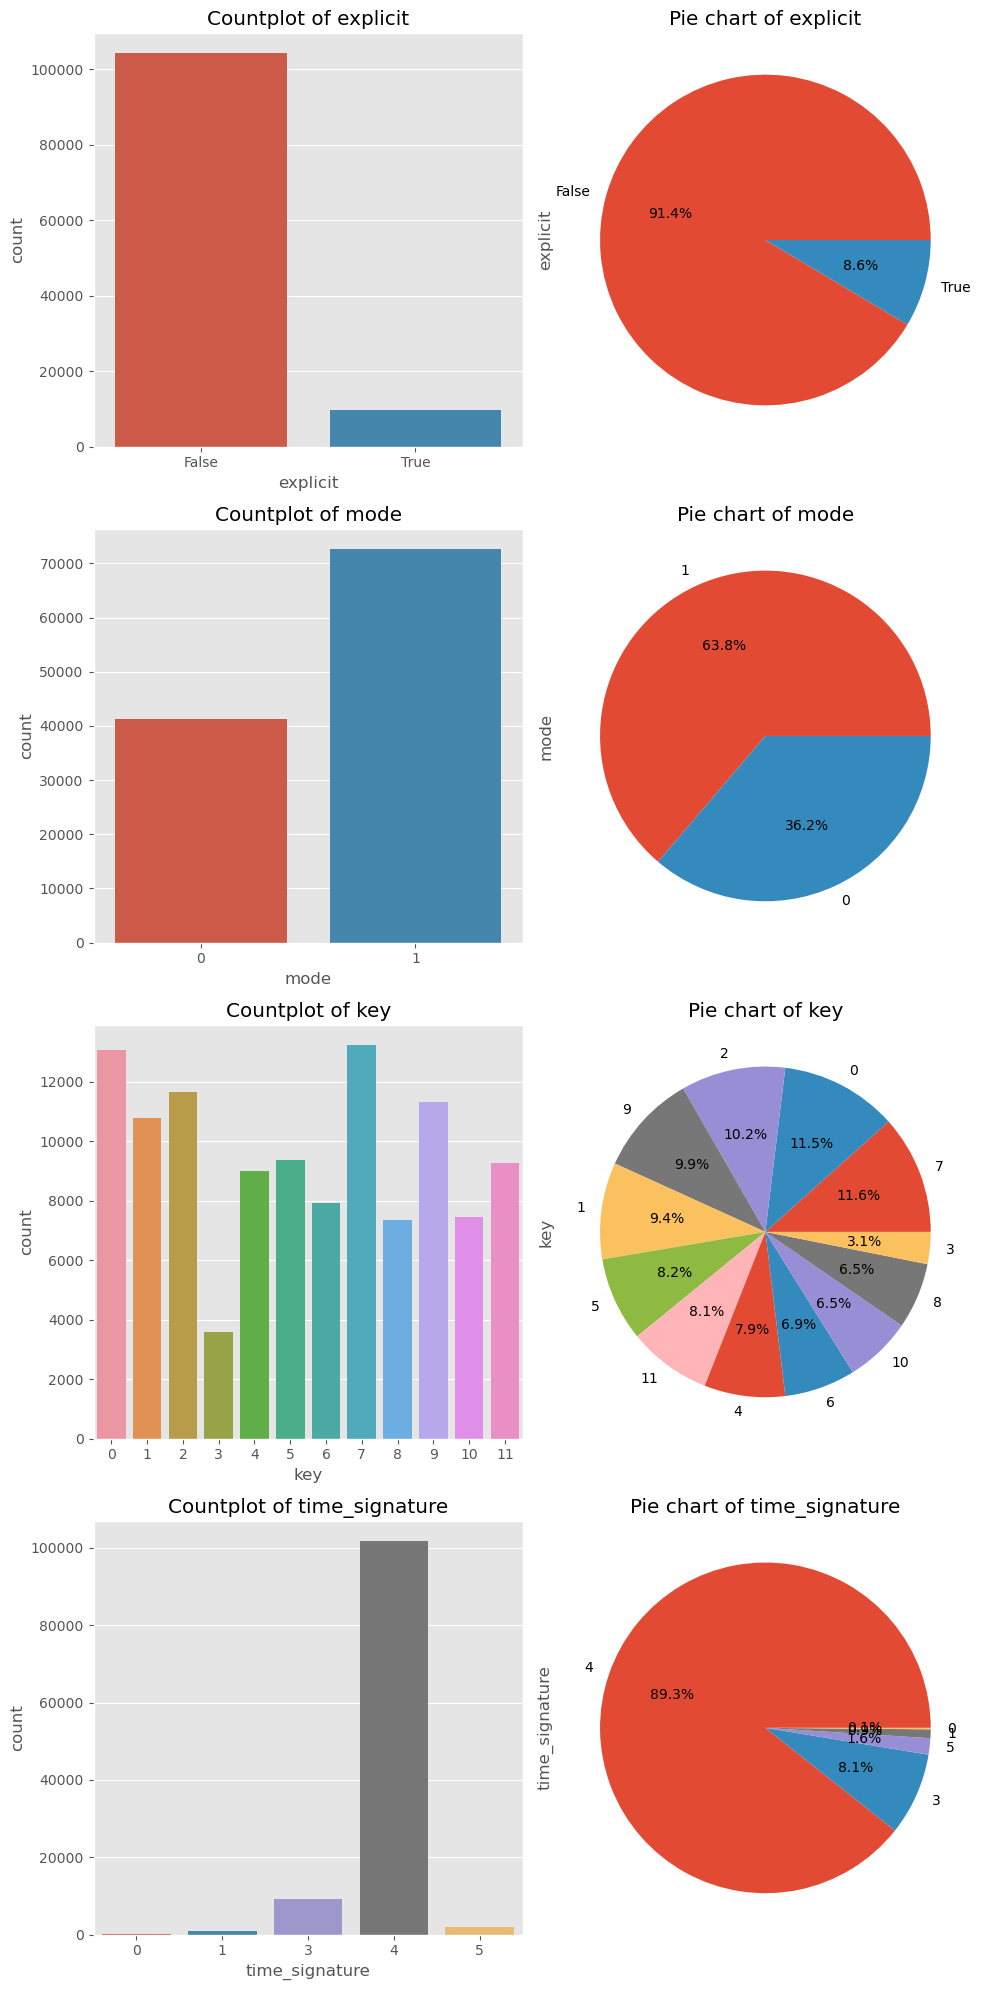

In [14]:
cat_col = ['explicit', 'mode', 'key', 'time_signature']

plt.figure(figsize=(10, 20))
n = len(cat_col)

for i, col in enumerate(cat_col, start=1):
    # Countplot
    plt.subplot(n, 2, 2*i-1)
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    
    # Pie chart
    plt.subplot(n, 2, 2*i)
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pie chart of {col}')
    
plt.tight_layout()
plt.show()


In [15]:
num_col = df.select_dtypes(include=['int','float']).columns
num_col                             

Index(['popularity', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

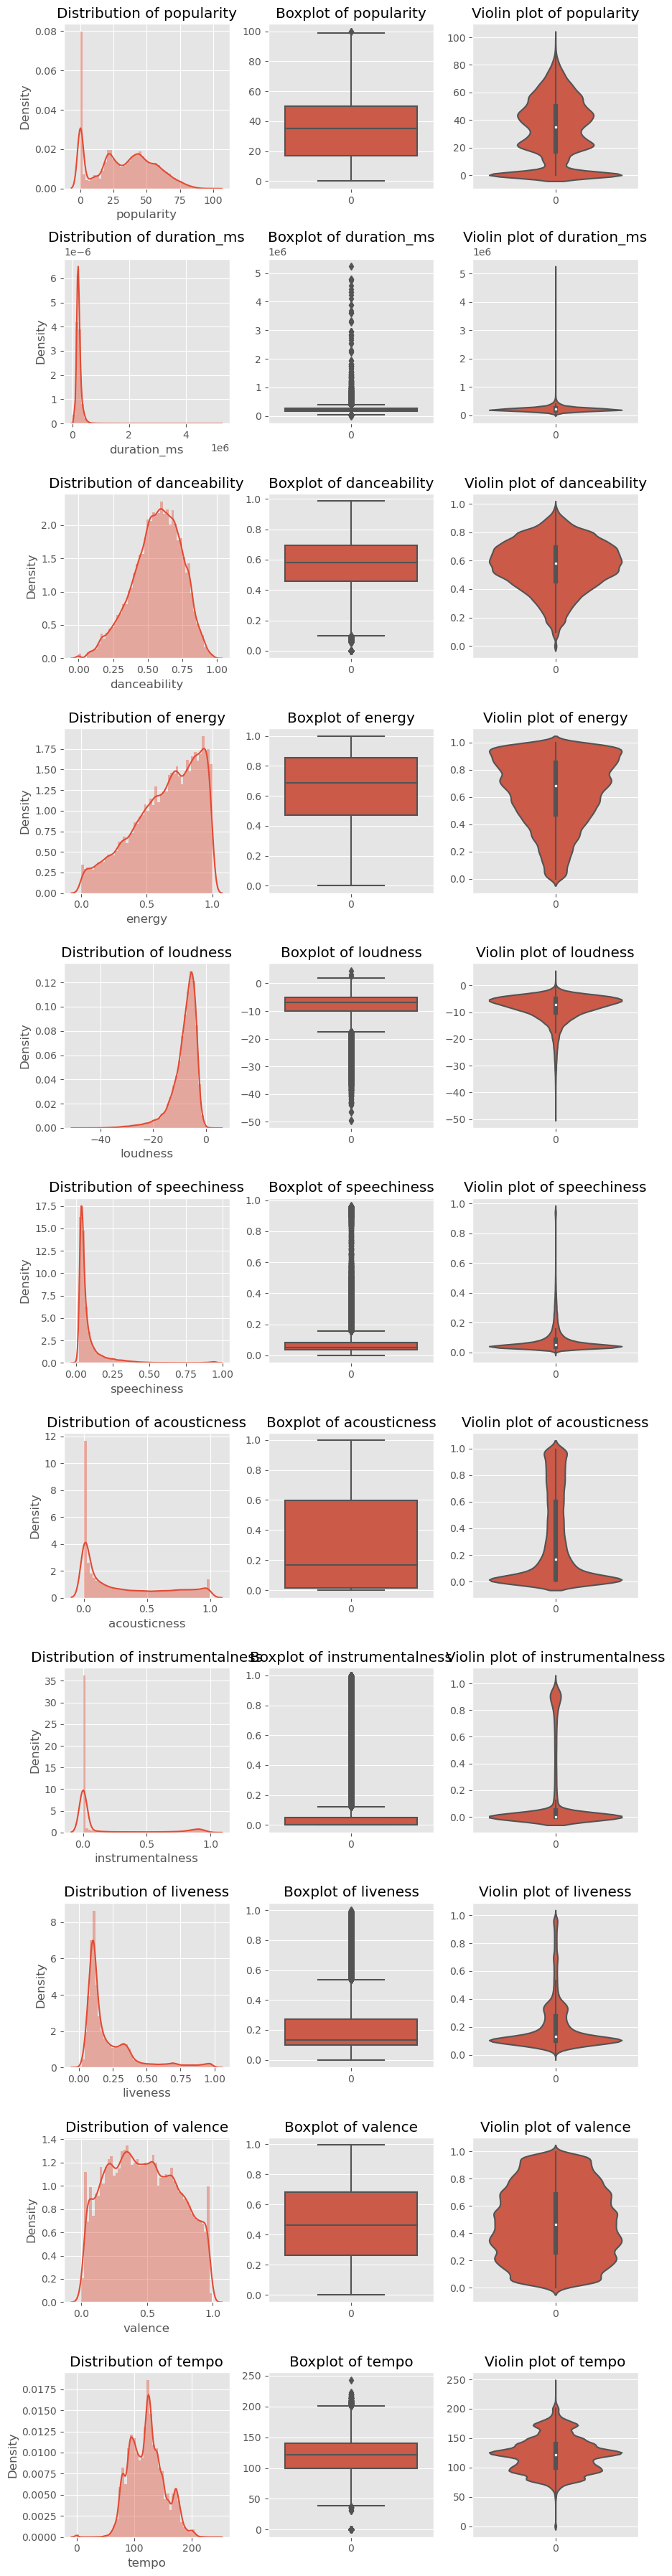

In [17]:
num_col = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 
           'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
           'valence', 'tempo']

plt.figure(figsize=(9, 36))
n = len(num_col)
x = 1

for col in num_col:
    plt.subplot(n, 3, x)
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
    x += 1
    
    plt.subplot(n, 3, x)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    x += 1
    
    plt.subplot(n, 3, x)
    sns.violinplot(df[col])
    plt.title(f'Violin plot of {col}')
    x += 1

plt.tight_layout()
plt.show()


In [19]:
col = list(df.select_dtypes(include=['bool','object']).columns)
col

['explicit', 'track_genre']

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in df.select_dtypes(include=['bool','object']):
    df[col] = label_encoder.fit_transform(df[col])
    
df[[col]].head()

,track_genre
0,0
1,0
2,0
3,0
4,0


In [21]:
type(df.select_dtypes(include=['bool','object']))

pandas.core.frame.DataFrame

In [22]:
df.select_dtypes(include=['bool','object']).columns

Index([], dtype='object')

In [23]:
x = df.copy()

## ======================================================
# Model Traning
## Elbow Method (Find the best value of K)

In [24]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,21):
    km = KMeans(n_clusters=k)
    km.fit(x)
    wcss.append(km.inertia_)

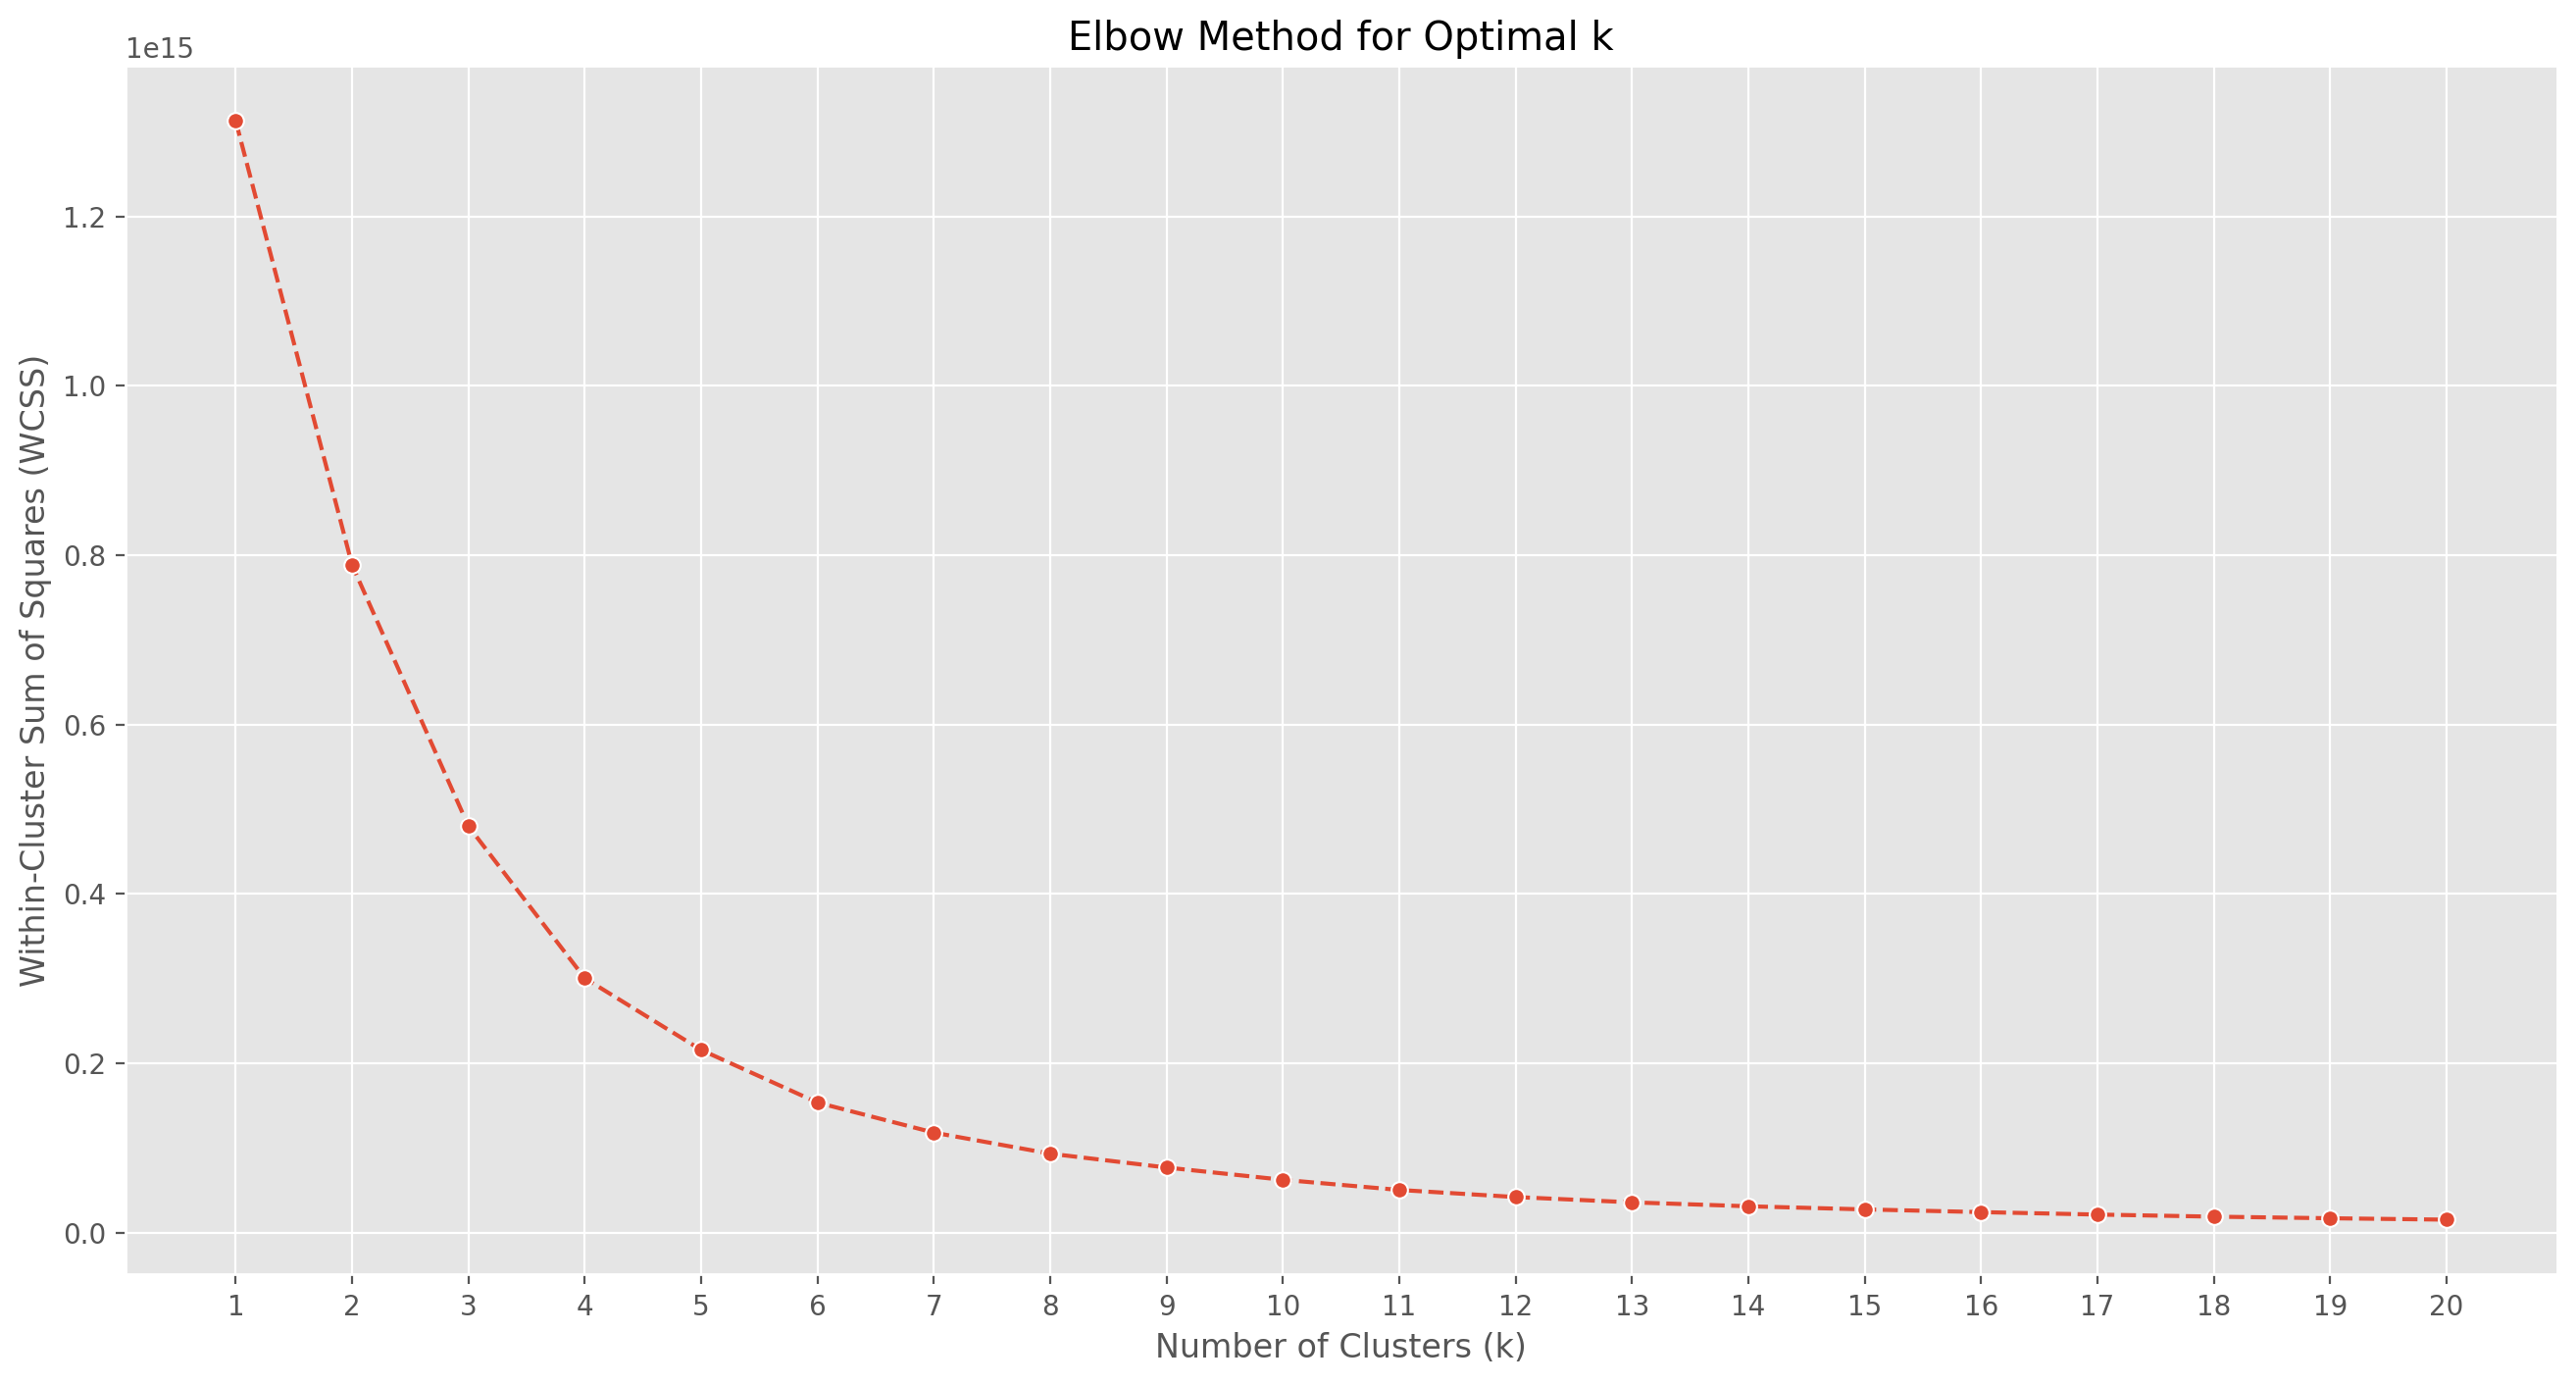

In [25]:
k = range(1, 21)
plt.figure(figsize=(16, 8), dpi=200)
sns.lineplot(x=k, y=wcss, marker='o', linestyle='--')

plt.xticks(k)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [26]:
#Best model
km_best = KMeans(n_clusters=4)
km_best.fit(x)

KMeans(n_clusters=4)

In [27]:
y_kmeans = km_best.predict(x)
y_kmeans[:200]

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1])

In [28]:
centroid = km_best.cluster_centers_
centroid

array([[ 3.46554653e+01,  2.64908014e+05,  6.40694874e-02,
         5.49606061e-01,  6.69330307e-01,  5.33477382e+00,
        -7.73239792e+00,  6.30568455e-01,  7.42566993e-02,
         2.76609141e-01,  1.35609829e-01,  2.12603698e-01,
         4.47210924e-01,  1.23321329e+02,  3.91832215e+00,
         5.61399854e+01],
       [ 3.26868867e+01,  1.68656283e+05,  1.08103598e-01,
         5.83835465e-01,  6.20435684e-01,  5.28012149e+00,
        -8.43980355e+00,  6.49472665e-01,  9.33710850e-02,
         3.52942044e-01,  1.37275461e-01,  2.13053430e-01,
         5.12528422e-01,  1.21219116e+02,  3.89446632e+00,
         5.73070389e+01],
       [ 2.89239347e+01,  4.59086625e+05,  3.82317802e-02,
         5.37589725e-01,  6.35358995e-01,  5.38298155e+00,
        -1.00650520e+01,  5.85822382e-01,  7.96101420e-02,
         2.48917529e-01,  4.30722508e-01,  2.23595858e-01,
         3.34308017e-01,  1.22291721e+02,  3.89300412e+00,
         5.23689101e+01],
       [ 2.20967742e+01,  3.51816858e

In [30]:
inertia = km_best.inertia_
print("Inertia:", inertia)

Inertia: 300204446528877.94


### **Title: Unsupervised Clustering Analysis of Spotify Music Data**

Introduction:
The assignment focuses on conducting an unsupervised clustering analysis of Spotify music data using the KMeans clustering algorithm. The objective is to group similar music tracks together based on their features without the need for labeled data.

Key Steps:
1. Data Understanding and Preparation:
   - Loaded the Spotify music dataset consisting of 114,000 rows and 21 columns.
   - Examined the data types, checked for duplicates and missing values, ensuring data integrity.
   
2. Exploratory Data Analysis (EDA):
   - Conducted EDA to understand the distribution and characteristics of both categorical and continuous variables.
   - Utilized count plots, pie charts, line plots, box plots, and violin plots to visualize the data distribution and identify patterns.
   
3. Data Preprocessing:
   - Handled categorical variables by encoding them using LabelEncoder to convert them into numerical values suitable for the KMeans algorithm.
   
4. Model Training and Evaluation:
   - Determined the optimal number of clusters using the elbow method and selected 4 clusters for the KMeans model.
   - Trained the KMeans model on the preprocessed data.
   - Evaluated the model's performance using the inertia metric, obtaining a value of 300204446528877.94.

Conclusion:
The assignment successfully applied unsupervised learning techniques to cluster Spotify music data, enabling the grouping of similar music tracks based on their features. By leveraging KMeans clustering, the analysis provided insights into the inherent structure of the dataset and facilitated better understanding and organization of the music tracks. This approach can be further extended to enhance music recommendation systems and improve user experience on the Spotify platform.